In [1]:
import numpy as np
import itertools 

In [2]:
class SOM(object):
    def __init__(self,row,col,dim_feat):
        self.shape = (row,col,dim_feat)
        self.som = np.zeros((row,col,dim_feat))   #initializing som with zeroes
        
        # Training parameters
        self.L0 = 0.0
        self.lam = 0.0
        self.sigma0 = 0.0
    
    def train(self,data,L0,lam,sigma0,initializer=np.random.rand):
        self.L0 = L0
        self.lam = lam
        self.sigma0 = sigma0
        self.data = data
        self.som = initializer(*self.shape)
        
        for t in itertools.count():
            if self.sigma(t) < 1.0:
                break
            i_data =  np.random.choice(range(len(data)))
            bmu = self.find_bmu(data[i_data])
            self.update_som(bmu,data[i_data],t)
    
    def quant_err(self):
        bmu_dists = []
        for input_vector in self.data:
            bmu = self.find_bmu(input_vector)
            bmu_feat = self.som[bmu]
            bmu_dists.append(np.linalg.norm(input_vector-bmu_feat))
        return np.array(bmu_dists).mean()

    def find_bmu(self, input_vec):
        list_bmu = []
        for y in range(self.shape[0]):
            for x in range(self.shape[1]):
                dist = np.linalg.norm((input_vec-self.som[y,x]))
                list_bmu.append(((y,x),dist))
        list_bmu.sort(key=lambda x: x[1])
        return list_bmu[0][0]
    
    def L(self, t):
        return self.L0*np.exp(-t/self.lam)
    
    def update_som(self,bmu,input_vector,t):
        for y in range(self.shape[0]):
            for x in range(self.shape[1]):
                dist_to_bmu = np.linalg.norm((np.array(bmu)-np.array((y,x))))
                self.update_cell((y,x),dist_to_bmu,input_vector,t)

    def update_cell(self,cell,dist_to_bmu,input_vector,t):
        self.som[cell] += self.N(dist_to_bmu,t)*self.L(t)*(input_vector-self.som[cell])

    def N(self,dist_to_bmu,t):
        curr_sigma = self.sigma(t)
        return np.exp(-(dist_to_bmu**2)/(2*curr_sigma**2))

    def sigma(self, t):
        return self.sigma0*np.exp(-t/self.lam) 


In [3]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [4]:
data,target = load_iris(True)

In [5]:
som_iris = SOM(10,10,4)
som_iris.train(data,L0=0.5,lam=1e2,sigma0=5)

In [6]:
som_iris.quant_err()

0.3545243820432977

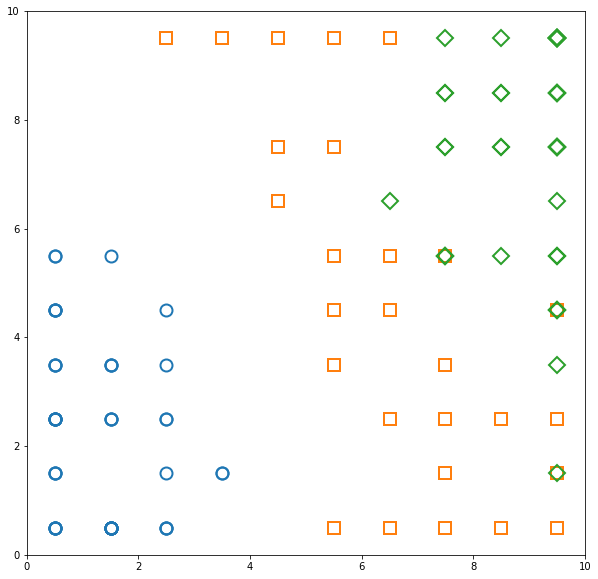

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
# Plotting the response for each pattern in the iris dataset
#plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

t = np.zeros(len(target), dtype=int)
t[target == 0] = 0
t[target == 1] = 1
t[target == 2] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    #print(cnt)
    w = som_iris.find_bmu(xx)  # getting the winner
    # place a marker on the winning position for the sample xx
    #print(colors[t[cnt]])
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 10, 0, 10])
#plt.savefig('iris.png')
plt.show()

In [8]:
#testing new data point
#test = np.random.randint(10)
for i in range(10):
    test = np.random.randint(150)
    #print(data[test])
    print("BMU",som_iris.find_bmu(data[test])," True label", target[test])

BMU (7, 0)  True label 1
BMU (6, 2)  True label 1
BMU (7, 8)  True label 2
BMU (9, 7)  True label 2
BMU (0, 1)  True label 0
BMU (9, 9)  True label 2
BMU (1, 0)  True label 0
BMU (7, 0)  True label 1
BMU (9, 9)  True label 2
BMU (9, 9)  True label 2
